# Population plots
Aim is to look at the orbits and see if things look systematic, for example as predicted by Beust & Morbidelli (1996).

In [1]:
import glob
import numpy as np
import astropy.units as u
from astropy import constants as const
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from funcs import *

%matplotlib notebook

In [2]:
dir = '/Users/grant/a-extra/archive/fits_calx/'
fs = glob.glob(dir+'*/chains.npy')
print('{} files'.format(len(fs)))

# order so that non-accelerating features are underneath
order = np.array([22., 20., 18., 15., 14., 11.,  9.,  7.,  6.,  5.,  3.,  1.,  2.,
        4.,  8., 10., 12., 13., 16., 17., 19., 21., 23., 24., 25., 26.,
        0.], dtype=int)
fs = np.array(fs)[np.flipud(order)]

# get ref spectrum
meanspec = np.load('meanspec-nocs-k.npy')
rv_ref = np.load('rv-k.npy')

27 files


In [3]:
chains = ()
pchains = ()
dates = np.array([], dtype=int)
for f in fs:
    chain = np.load(f, mmap_mode='r')
    pchain = np.load(f.replace('chai','para_chai'), mmap_mode='r')
    print('file:{}  \t lengths:\t{}\t{}'.format(f.split('fits_calx')[1], chain.shape, pchain.shape))
    chains += (chain[:,-1:,:].reshape((-1,6)),)
#     print('file:{} \t length:{}'.format(f.replace('ch','para_ch'), pchain.shape))
    pchains += (pchain[:,-1:,:].reshape((-1,5)),)
    dates = np.append(dates, int(f.split('fits_calx/')[1].split('/chains.npy')[0][:5]))
    chain = pchain = 0

file:/54542/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/57494/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/57492/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/57344b/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/57344a/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/57333/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/56982a/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/56980/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/56706/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/56580/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/55597a/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/55567a/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/55565/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/54829a/chains.npy  	 lengths:	(256, 100000, 6)	(256, 100000, 5)
file:/54780a/chains.npy  	 l

In [4]:
# save the final steps
np.save('dates_final.npy', dates)
np.save('eccentric_final.npy', np.array(chains))
np.save('parabolic_final.npy', np.array(pchains))

In [5]:
# keep consistent colours across plots
ncol = len(chains)
cm1 = plt.get_cmap('tab20b')
cm2 = plt.get_cmap('tab20c')
cols = np.array([])
for i in range(ncol):
    cols = np.append(cols, cm1(1.*i/ncol) )  # color will now be an RGBA tuple
#     cols = np.append(cols, cm2(1.*i/ncol) )  # color will now be an RGBA tuple

cols = cols.reshape(ncol,4)
cols = np.roll(cols, 5, axis=0)
# cols

<IPython.core.display.Javascript object>


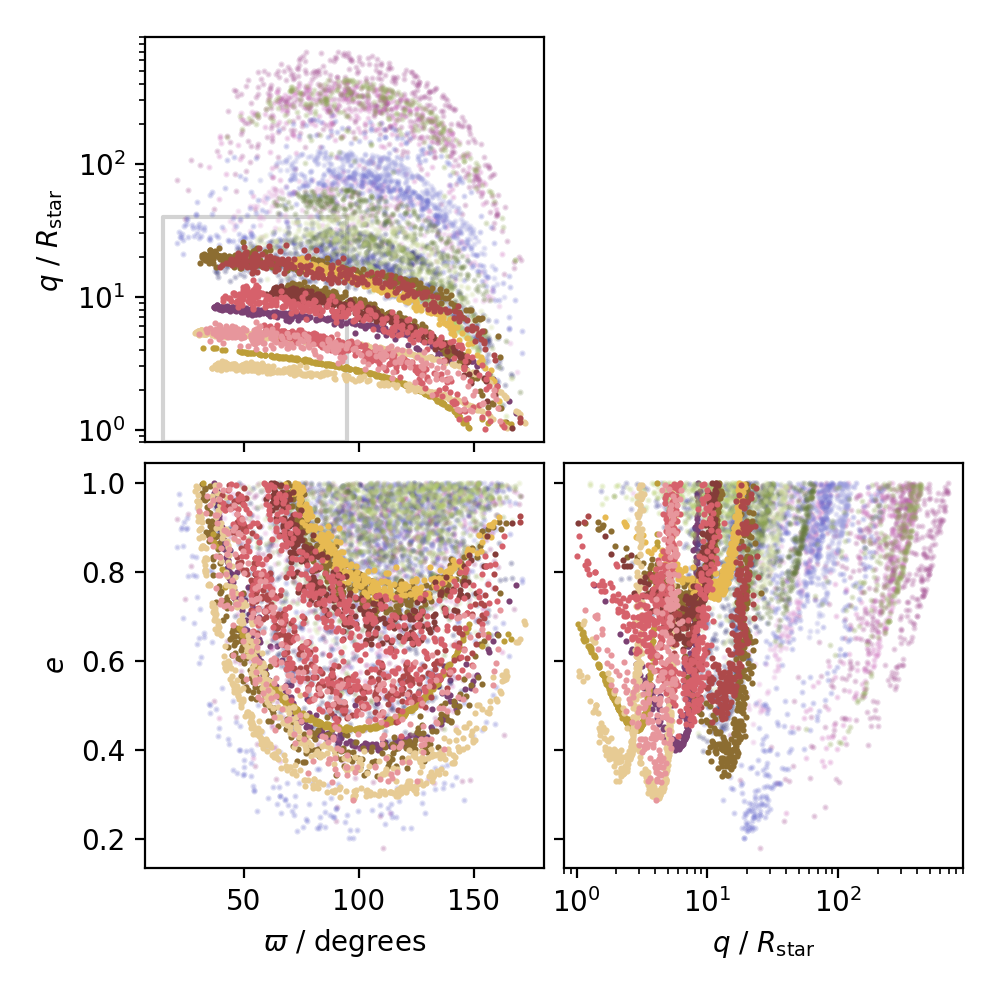

<IPython.core.display.Javascript object>


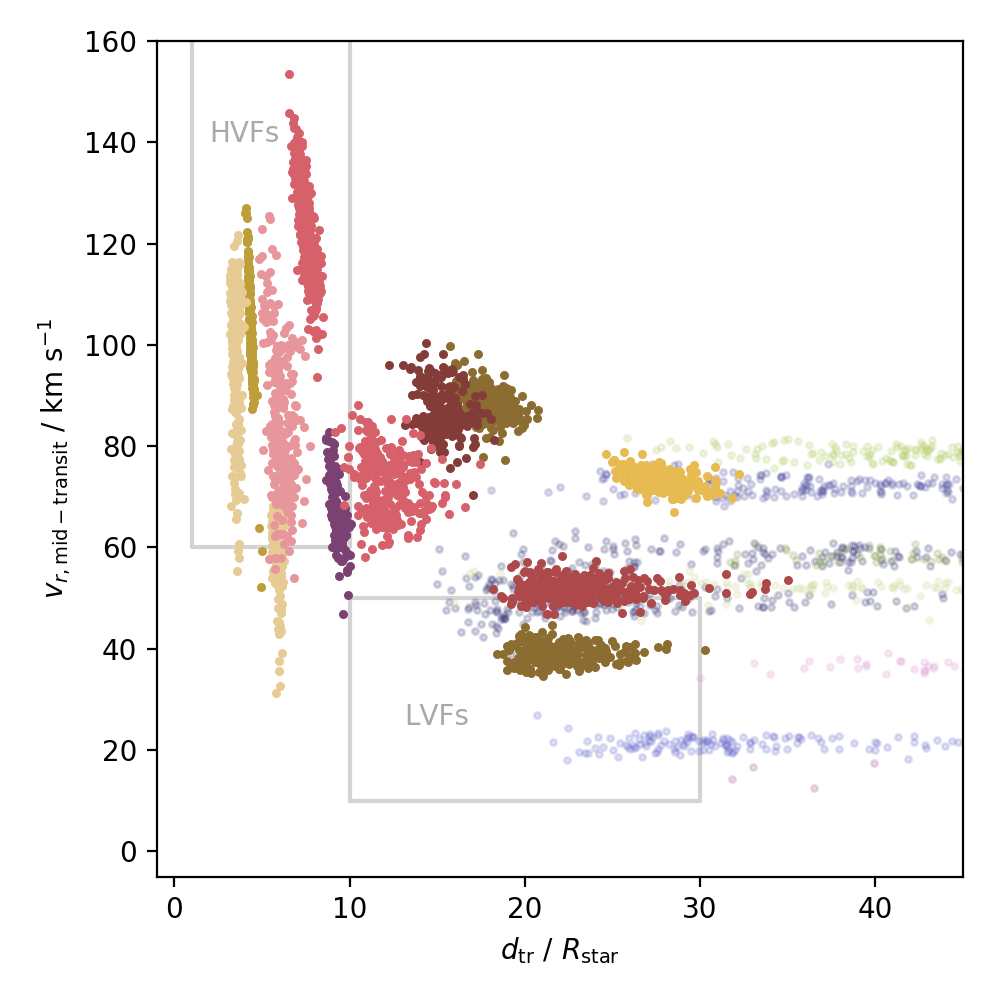

<IPython.core.display.Javascript object>


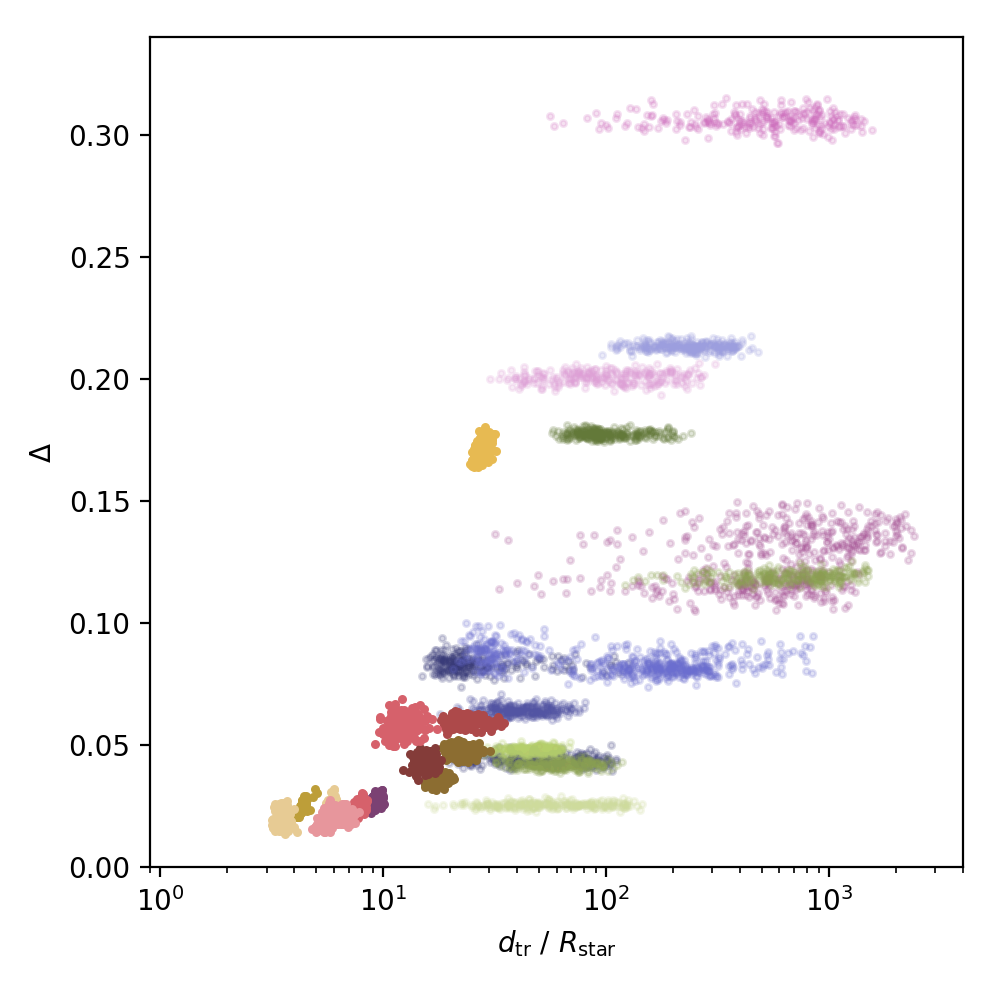

<IPython.core.display.Javascript object>


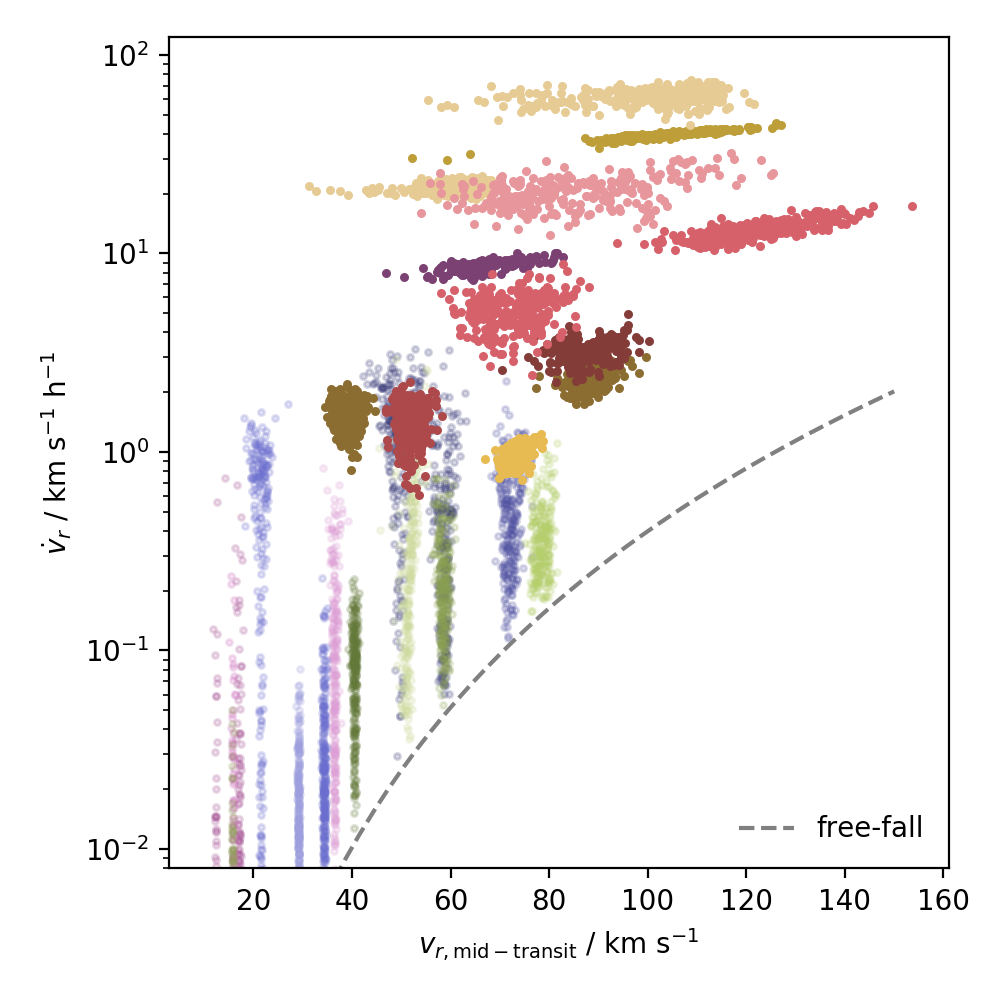

In [15]:
fig,ax = plt.subplots(2, 2, figsize=(5,5), sharex='col', sharey='row')
fig1,ax1 = plt.subplots(figsize=(5,5))
fig2,ax2 = plt.subplots(figsize=(5,5))
fig3,ax3 = plt.subplots(figsize=(5,5))

e1 = np.linspace(0,1,100)
q1 = (1-e1) * (4 - np.sqrt(1-e1**2))**2

ax[0,0].plot([15,95,95,15,15],[0.8,0.8,40,40,0.8], alpha=1, color='lightgrey', zorder=-99)

ax1.plot([1,1,10,10],[160,60,60,160], alpha=1, color='lightgrey', zorder=-99)
ax1.plot([10,10,30,30,10],[10,50,50,10,10], alpha=1, color='lightgrey', zorder=-99)
ax1.text(4, 140, 'HVFs', horizontalalignment='center', color='darkgrey')
ax1.text(15, 25, 'LVFs', horizontalalignment='center', color='darkgrey')

for i,c in enumerate(chains):
    
    w = c[:,0]
    q = c[:,1]
    t0 = c[:,2]
    dep = c[:,3]
    e = c[:,5]
    Q = q*(1+e)/(1-e)    

    # append some other parameters
#     d = np.zeros(c.shape[0])
    d1 = np.zeros(c.shape[0])
#     rv = np.zeros(c.shape[0])
    rv1 = np.zeros(c.shape[0])
    acc1 = np.zeros(c.shape[0])
    for j in range(len(d1)):
        # at start of observations
#         in_tr, vel, dt, f, r, x, bigy, acc= orbit_rv(w[j], q[j], t0[j],
#                                                      np.array([0]), e[j],
#                                                      testing=True)
#         d[j] = -bigy / u.R_sun.to('m') / 1.5
#         rv[j] = vel / 1e3
        # at mid-transit
        in_tr, vel, dt, f, r, x, bigy, acc = orbit_rv(w[j], q[j], t0[j],
                                                      np.array([t0[j]]), e[j],
                                                      testing=True)
        d1[j] = -bigy / u.R_sun.to('m') / 1.5
        rv1[j] = vel / 1e3
        acc1[j] = acc / 1e3 * 3600

    # convert depth to absorption fraction
    cont = np.interp(rv1, rv_ref, meanspec)
    f = dep / cont
        
#     print('max d:{}'.format(np.max(d1)))
    alp = 1
    if np.max(d1) > 60:
        alp = 0.2
    sel = e > 0.

    lab = fs[i].split(dir)[1].split('/chains.npy')[0]
    sz = (e[sel]*1.5)**4
    sz = (10/d1[sel])
    sz1 = (e[sel]*2)**4
    sz = 1.5
    sz1 = 5
   
    ax[0,0].scatter(np.rad2deg(w[sel]), q[sel], s=sz, label=lab, color=cols[i], alpha=alp, zorder=-1)  
    ax[1,0].scatter(np.rad2deg(w[sel]), e[sel], s=sz, label=lab, color=cols[i], alpha=alp, zorder=-1)
    ax[1,1].scatter(q[sel], e[sel], s=sz, label=lab, color=cols[i], alpha=alp, zorder=-1)
#     ax[0,1].plot(0,0, '.', label=lab, color=cols[i])

#     if alp == 1:
    #     ax1.scatter(d, rv, label=lab, s=sz1, color=cols[i])
    ax1.scatter(d1, rv1, label=lab, s=sz1, color=cols[i], alpha=alp, zorder=-1)
#     ax1.text(d1[0],rv1[0], lab)

    ax2.scatter(d1, f, label=lab, s=sz1, color=cols[i], alpha=alp, zorder=-1)

    ax3.scatter(rv1, acc1, label=lab, s=sz1, color=cols[i], alpha=alp, zorder=-1)
    
ax[0,0].set_ylabel('$q$ / $R_{\\rm star}$')
ax[0,0].set_ylim(0.8,900)
ax[0,0].set_yscale('log')

# ax[0,1].legend()
ax[0,1].axis('off')

ax[1,0].set_xlabel('$\\varpi$ / degrees')
ax[1,0].set_ylabel('$e$')

ax[1,1].set_xlabel('$q$ / $R_{\\rm star}$')
ax[1,1].set_xlim(0.8,900)
ax[1,1].set_xscale('log')

ax1.set_xlabel('$d_{\\rm tr}$ / $R_{\\rm star}$')
ax1.set_ylabel('$v_{r, {\\rm mid-transit}}$ / km s$^{-1}$')
ax1.set_xlim(-1,45)
ax1.set_ylim(-5,160)

# x = np.linspace(3,50,100)
# ax2.plot(x, 1e-4*x**2)
ax2.set_xlim(0.9,4e3)
ax2.set_ylim(0.0,0.34)
ax2.set_xlabel('$d_{\\rm tr}$ / $R_{\\rm star}$')
ax2.set_ylabel('$\Delta$')
ax2.set_xscale('log')
# ax2.set_yscale('log')

ax3.set_yscale('log')
ax3.set_ylim(8e-3,None)
ax3.set_xlabel('$v_{r, {\\rm mid-transit}}$ / km s$^{-1}$')
ax3.set_ylabel('$\\dot{v}_r$ / km s$^{-1}$ h$^{-1}$')
v = np.linspace(10,150)
ax3.plot(v, (v*1e3)**4/(4*const.G.value * 1.7 * u.M_sun.to('kg'))/1e3*3600,
         '--', color='grey')
gr = mlines.Line2D([], [], linestyle='--', color='grey', label='free-fall')
ax3.legend(handles=[gr], frameon=False, loc=4)

for a in ax.flatten().tolist():
    a.set_rasterization_zorder(0)
for a in [ax1,ax2,ax3]:
    a.set_rasterization_zorder(0)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.05)
fig.savefig('/Users/grant/astro/doc/feb-accel/elem.eps')

fig1.tight_layout()
fig1.savefig('/Users/grant/astro/doc/feb-accel/rv_d.eps')

fig2.tight_layout()
fig2.savefig('/Users/grant/astro/doc/feb-accel/dep_d.eps')

fig3.tight_layout()
fig3.savefig('/Users/grant/astro/doc/feb-accel/d_acc.eps')

<IPython.core.display.Javascript object>


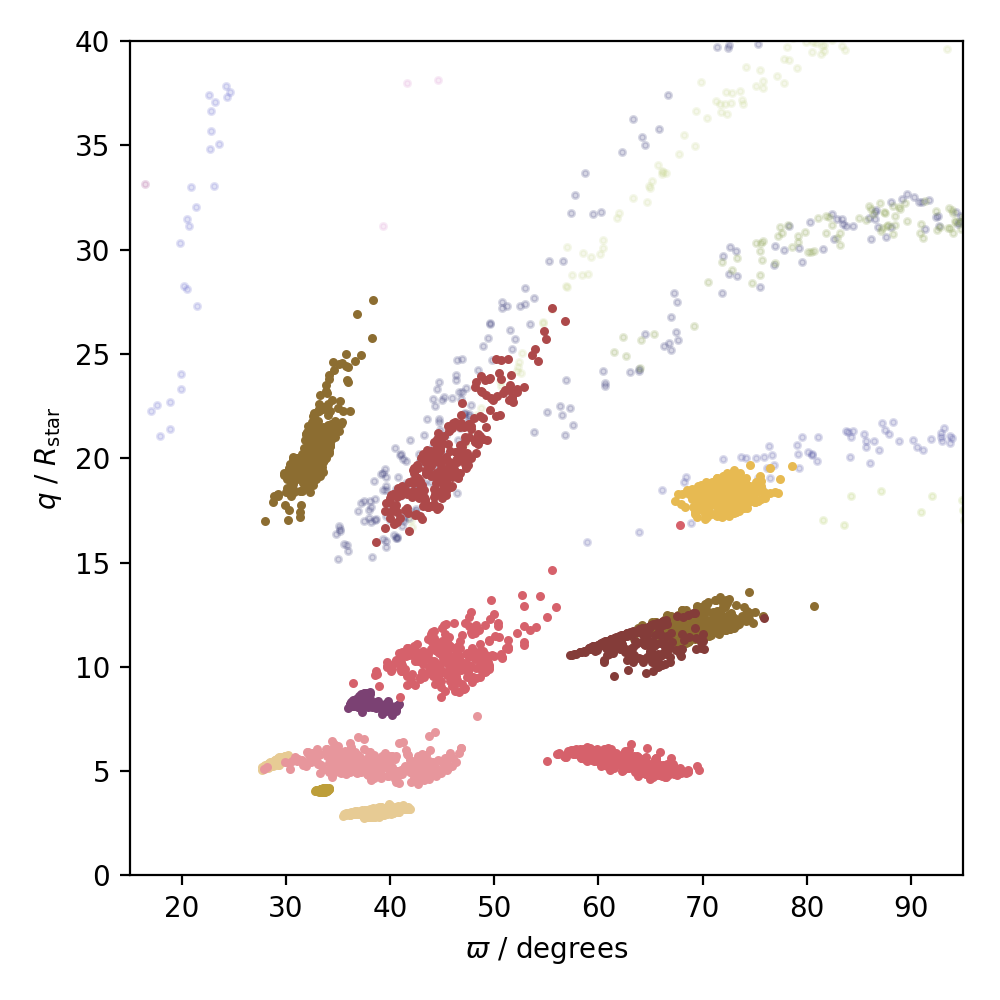

<IPython.core.display.Javascript object>


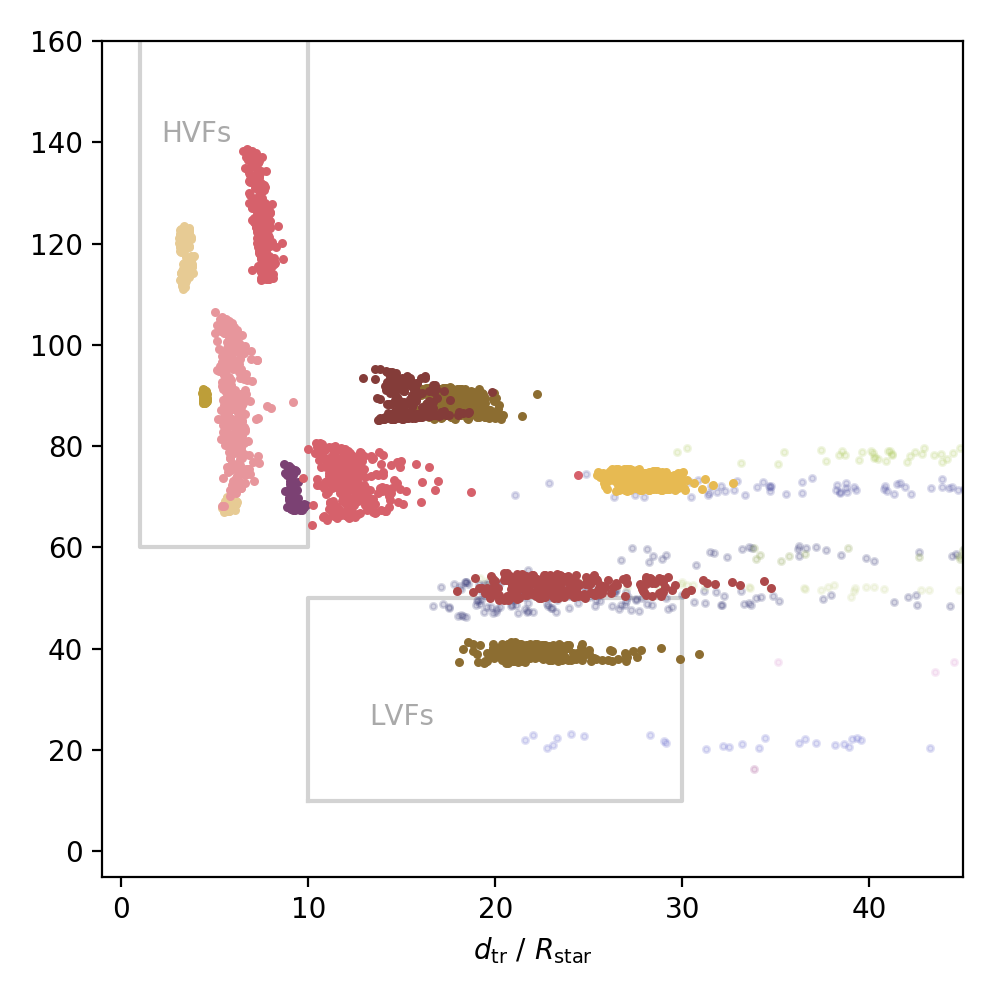

<IPython.core.display.Javascript object>


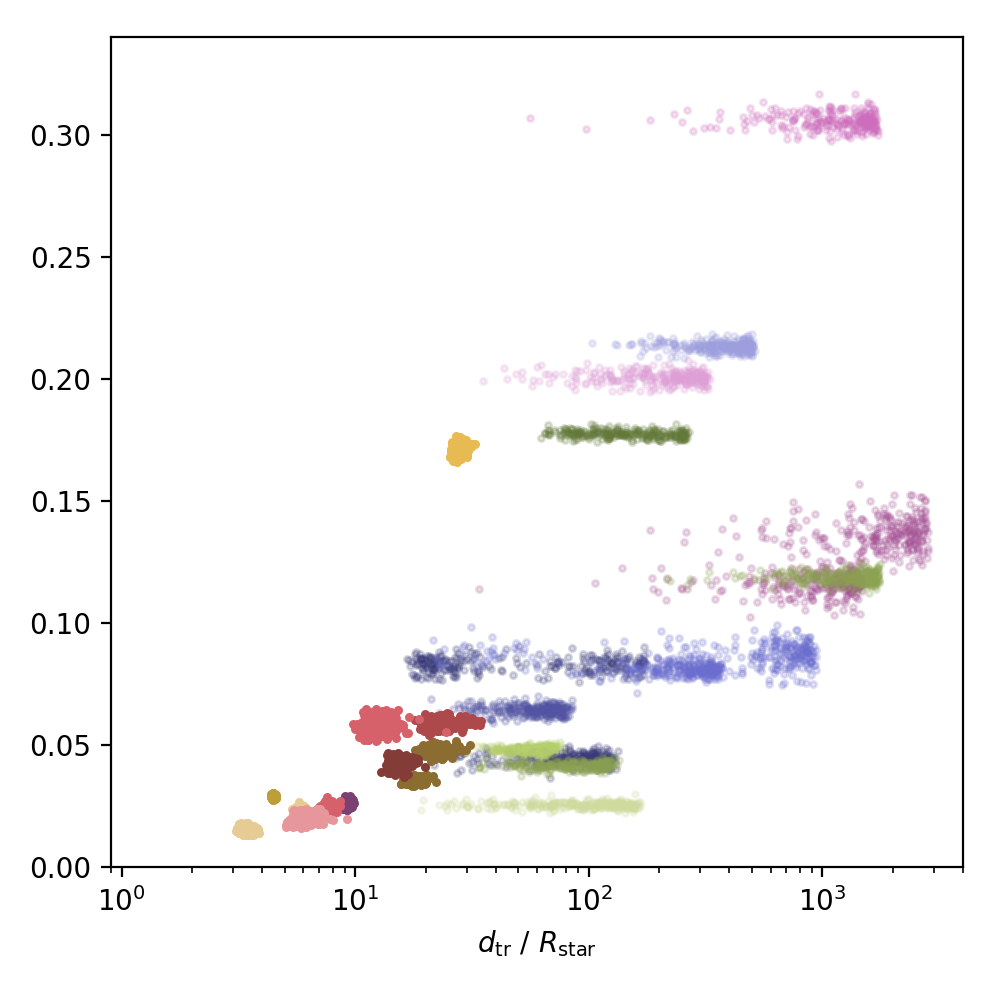

In [12]:
fig,ax = plt.subplots(figsize=(5,5))
fig1,ax1 = plt.subplots(figsize=(5,5))
fig2,ax2 = plt.subplots(figsize=(5,5))

ax1.plot([1,1,10,10],[160,60,60,160], alpha=1, color='lightgrey', zorder=-99)
ax1.plot([10,10,30,30,10],[10,50,50,10,10], alpha=1, color='lightgrey', zorder=-99)
ax1.text(4, 140, 'HVFs', horizontalalignment='center', color='darkgrey')
ax1.text(15, 25, 'LVFs', horizontalalignment='center', color='darkgrey')

para_q = ()
para_w = ()
para_vr = ()
para_dtr = ()
para_f = ()
para_a = ()

for i,c in enumerate(pchains):
    
    w = c[:,0]
    q = c[:,1]
    t0 = c[:,2]
    dep = c[:,3]

    # append some other parameters
    d = np.zeros(c.shape[0])
    a = np.zeros(c.shape[0])
    rv = np.zeros(c.shape[0])
    for j in range(len(d)):
        in_tr, vel, dt, f, r, x, bigy, acc = orbit_rv(w[j], q[j], t0[j],
                                                     np.array([t0[j]]), 1,
                                                     testing=True)
        d[j] = -bigy / u.R_sun.to('m') / 1.5
        rv[j] = vel / 1e3
        a[j] = acc / 1e3 * 3600

    # convert depth to absorption fraction
    cont = np.interp(rv, rv_ref, meanspec)
    f = dep / cont
    
    # save these
    para_q += (q,)
    para_w += (w,)
    para_vr += (rv,)
    para_dtr += (d,)
    para_f += (f,)
    para_a += (a,)
        
    alp = 1
    if np.max(d) > 60:
        alp = 0.2

    lab = fs[i].split(dir)[1].split('/chains.npy')[0]
   
    ax.scatter(np.rad2deg(w), q, label=lab, s=5, color=cols[i], alpha=alp, zorder=-1)  
    ax1.scatter(d, rv, label=lab, s=5, color=cols[i], alpha=alp, zorder=-1)  

    ax2.scatter(d, f, label=lab, s=5, color=cols[i], alpha=alp, zorder=-1)

ax.set_xlabel('$\\varpi$ / degrees')
ax.set_ylabel('$q$ / $R_{\\rm star}$')
ax.set_xlim(15,95)
ax.set_ylim(0.,40)
# ax.set_yscale('log')

ax1.set_xlabel('$d_{\\rm tr}$ / $R_{\\rm star}$')
# ax1.set_ylabel('$v_{r, {\\rm mid-transit}}$ / km s$^{-1}$')
ax1.set_xlim(-1,45)
ax1.set_ylim(-5,160)

ax2.set_xlim(0.9,4e3)
ax2.set_ylim(0.0,0.34)
ax2.set_xlabel('$d_{\\rm tr}$ / $R_{\\rm star}$')
# ax2.set_ylabel('$f_{\\rm abs}$')
ax2.set_xscale('log')

for a in [ax,ax1,ax2]:
    a.set_rasterization_zorder(0)

fig.tight_layout()
fig.savefig('/Users/grant/astro/doc/feb-accel/elem_para.eps')
fig1.tight_layout()
fig1.savefig('/Users/grant/astro/doc/feb-accel/rv_d_para.eps')
fig2.tight_layout()
fig2.savefig('/Users/grant/astro/doc/feb-accel/dep_d_para.eps')

In [8]:
# print some results for the Table
for i,f in enumerate(fs):

    if np.max(para_dtr[i]) > 60:
        continue

    print('{} & {:.0f} & {:.1f} & {:.0f} & {:.1f} & {:.0f} & {:.1g} & {:.1f} & {:.1g} & {:.0f} & {:.1g} & {:.1g} & {:.1g} \\\\'. \
          format(fs[i].split(dir)[1].split('chains.npy')[0][:5],
                 np.median(para_a[i]),
                 np.std(para_a[i]),
                 np.median(para_vr[i]),
                 np.std(para_vr[i]),
                 np.median(para_q[i]),
                 np.std(para_q[i]),
                 np.median(para_w[i]),
                 np.std(para_w[i]),
                 np.median(para_dtr[i]),
                 np.std(para_dtr[i]),
                 np.median(para_f[i]),
                 np.std(para_f[i]),
                          )
         )

54542 & 9 & 0.4 & 68 & 2.0 & 8 & 0.2 & 0.6 & 0.02 & 9 & 0.2 & 0.03 & 0.001 \\
54829 & 2 & 0.3 & 88 & 1.8 & 12 & 0.5 & 1.2 & 0.04 & 18 & 1 & 0.04 & 0.0009 \\
54829 & 2 & 0.3 & 39 & 1.1 & 20 & 2 & 0.6 & 0.03 & 22 & 2 & 0.05 & 0.001 \\
54913 & 38 & 0.7 & 90 & 0.6 & 4 & 0.04 & 0.6 & 0.004 & 4 & 0.04 & 0.03 & 0.0005 \\
55170 & 1 & 0.1 & 73 & 1.2 & 18 & 0.5 & 1.3 & 0.03 & 28 & 1 & 0.2 & 0.002 \\
55567 & 22 & 1.1 & 68 & 0.5 & 5 & 0.1 & 0.5 & 0.008 & 6 & 0.1 & 0.02 & 0.0008 \\
55597 & 65 & 6.0 & 117 & 3.3 & 3 & 0.1 & 0.7 & 0.02 & 3 & 0.2 & 0.02 & 0.001 \\
56685 & 3 & 0.4 & 86 & 2.8 & 11 & 0.5 & 1.1 & 0.05 & 15 & 1 & 0.04 & 0.002 \\
56694 & 1 & 0.3 & 52 & 1.4 & 20 & 2 & 0.8 & 0.06 & 23 & 3 & 0.06 & 0.002 \\
56982 & 5 & 1.0 & 73 & 4.1 & 10 & 1 & 0.8 & 0.06 & 12 & 1 & 0.06 & 0.003 \\
56988 & 13 & 1.3 & 125 & 7.3 & 5 & 0.4 & 1.1 & 0.06 & 7 & 0.4 & 0.02 & 0.002 \\
57344 & 21 & 3.4 & 89 & 9.7 & 5 & 0.5 & 0.7 & 0.07 & 6 & 0.5 & 0.02 & 0.002 \\
